$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
# 1-D, 3-Site Hubbard Model

The Hubbard Hamiltonian for a 1-D chain of sites is:

\begin{equation} H = -t\sum_{<ij>,\sigma}(\hat{c}_{i_\sigma}\hat{c}_{j_\sigma} + \hat{c}_{j_\sigma}^\dagger\hat{c}_{i_\sigma} ) + U\sum_i\hat{c}_{i_\uparrow}^{\dagger}\hat{c}_{i_\uparrow}\hat{c}_{i_\downarrow}^{\dagger}\hat{c}_{i_\downarrow}
\end{equation}
and under the Jordan-Wigner mapping, this Hamiltonian becomes:

\begin{equation}
H = -\frac{t}{2}\sum_{<ij>}Z_{i+1:j-1}(X_{i}X_{j} + Y_{i}Y_{j}) + \frac{U}{4}\sum_{ij}(I-Z_{i})(I-Z_{j})
\end{equation}
where $Z_{i}$, $X_{i}$, and $Y_{i}$ are the corresponding Pauli matrices acting on the $i^{th}$ fermionic mode and for a chain with only 3-sites, there are no Pauli $Z$ strings in the hopping term of the Hamiltonian.

## 3-Site Hamiltonian and Qubit Mapping

Writing out the sum over the three sites, the Hamiltonian becomes:

\begin{align}
     H = &-\frac{t}{2}(X_0X_1 + Y_0Y_1) - \frac{t}{2}(X_1X_2 + Y_1Y_2) \nonumber \\ 
&-\frac{t}{2}(X_3X_4 + Y_3Y_4) - \frac{t}{2}(X_4X_5 + Y_4Y_5) \nonumber\\
&+ \frac{U}{4}(I-Z_0)(I-Z_3)+ \frac{U}{4}(I-Z_1)(I-Z_4) + \frac{U}{4}(I-Z_2)(I-Z_5) \nonumber\\
= &H_{01} + H_{12} + H_{23} + H_{34} + H_{03} + H_{14} + H_{25}
\end{align}

### Qubit Mapping

Each site in the 3-site chain is represented by two qubits, one for each spin, and the wavefunction is represented as

$$ \ket{\psi} = \ket{q_0}\ket{q_1}\ket{q_2}\ket{q_3}\ket{q_4}\ket{q_5} $$

where $\ket{q_i} = \{ \ket{0}, \ket{1} \} $ represent unoccupied or occupied sites, $i=0,1,2$ are the spin up electron occupations and $i=3,4,5$ are the spin down electron occupations.


## Time Evolution

We want to simulate the time evolution of $\ket{\psi}$ via 

$$ \ket{\psi(t+\Delta t)} = e^{-iH\Delta t}\ket{\psi(t)} $$


We can do this via the Suzuki-Trotter formula which states that, to first order in $\Delta t$

$$e^{iH\Delta t} \approx e^{iH_{10}^{\uparrow}\Delta t}e^{iH_{12}^{\uparrow}\Delta t}e^{iH_{10}^{\downarrow}\Delta t}e^{iH_{12}^{\downarrow}\Delta t}e^{iH_0\Delta t}e^{iH_1\Delta t}e^{iH_2\Delta t} $$.


So what do the gates look like for each of these terms?

#### Hopping Terms

For each pair of hopping terms we have
\begin{equation}e^{-i\Delta t(\frac{-t}{2})(X_iX_j + Y_iY_j)} \approx e^{\frac{it\Delta t}{2}X_iX_j} e^{\frac{it\Delta t}{2}Y_iY_j}.
\label{eq:op-expansion}
\end{equation}

Expanding the first term on the right hand side

\begin{align}
e^{\frac{it\Delta t}{2}X_iX_j} = & \sum_{k=0}^{\infty} \frac{1}{k!}\left(\frac{it\Delta t}{2}X_iX_j\right)^k \nonumber \\
 =& \sum_{k, even}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)^k I + \sum_{k, odd}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)X_i X_j \nonumber \\ 
 = &\cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left( \frac{t\Delta t}{2}\right)X_i X_j \nonumber \\
 = &\begin{pmatrix}\cos\theta & 0 & 0 & i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix},
\end{align}
with $\theta=\frac{t\Delta t}{2}$, and written in the $\ket{q_{i}q_{j}}$ basis.

Similarly for the $Y_i Y_j$ terms

\begin{align}
    e^{i\frac{t\Delta t}{2}Y_i Y_j} =& \cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left(\frac{t\Delta t}{2}\right)Y_i Y_j \nonumber \\
= & \begin{pmatrix}\cos\theta & 0 & 0 & -i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ -i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix}.
\end{align}


Note also that these matrices are diagonal save for the 4x4 block corresponding to a gate acting on qubits $i$ and $j$.

### On-Site Terms


Now we'll expand the on-site term, $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$.  First we examine the powers of $(I-Z_i)(I-Z_j)$:

\begin{align} (I-Z_i)^2(I-Z_j)^2 &= (I + I - 2Z_i)(I+I-2Z_j) = 4(I-Z_i)(I-Z_j) \\
(I-Z_i)^3(I-Z_j)^3& = (I-Z_i)(I-Z_j)(I-Z_i)^2(I-Z_j)^2 \nonumber \\
&= 4(I-Z_i)^2(I-Z_j)^2 = 16(I-Z_i)(I-Z_j)\\
(I-Z_i)^4(I-Z_j)^4& = 16(I-Z_i)^2(I-Z_j)^2 = 4^3(I-Z_i)(I-Z_j)\\
\implies (I-Z_i)^k(I-Z_j)^k& = 4^{k-1}(I-Z_i)(I-Z_j), \end{align}

then writing out the expansion of $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$ we get

\begin{align} e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)} &= \sum_k \frac{1}{k!}\left(\frac{i\Delta tU}{4}\right)^k(I-Z_i)^k(I-Z_j)^k \\
&= I+(I-Z_i)(I-Z_j)\sum_k \frac{\left(i\Delta tU\right)^k}{k!}\frac{4^{k-1}}{4^k} - \frac{1}{4}(I-Z_i)(I-Z_j) \\
& = I-\frac{1}{4}(I-Z_i)(I-Z_j) + \frac{1}{4}e^{iU\Delta t}(I-Z_i)(I-Z_j)  \\
& \boxed{= I-(I-Z_i)(I-Z_j)\left(1-e^{iU\Delta t} \right) } \\
&= \begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1& 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{iU\Delta t} \end{pmatrix} .
\end{align}

## Measurement

The onsite terms of the Hamiltonian map to a matrix of the form

$$ (I-Z_i^\uparrow)(I-Z_i^\downarrow) = \ket{11}\bra{11}_{\uparrow\downarrow} $$,

the on-site energy for each site is the probability that the two qubits $\ket{q_j}_\uparrow$,$\ket{q_j}_\downarrow$ corresponding to site $j$ are *both* measured in the $\ket{1}$ state.

The hopping terms of the Hamiltonian require a bit more preparation.  To efficiently measure the hopping terms, first transform the hopping operator using the circuit found in Fig. 5 of the *Cade, Mineh, Montanaro, Stanisic* arXiv paper, *Strategies for solving the Fermi-Hubbard Model on Near-Term Quantum Computers.*  This diagonalizes the operator to

$$ D = \ket{01}\bra{01} - \ket{10}\bra{10} $$

which is equivalent to the probability of getting the outcome '01' minus the probability of getting '10' for any pair of qubits in the chain.  It also should be noted that the qubit pairs $(i-1, i)$ and $(i,i+1)$ cannot be measured simultaneously under this transformation and so if we have more than 2 sites, we need at least 2 circuit runs to measure *all* hopping terms.

### Tunneling w/ Different Hopping Terms

To simulate tunneling between sites, we apply the time evolution operator several times and measure the probabilities of each site.  To simulate hopping between different materials, the angle $\theta = \frac{t\Delta t}{2}$ is changed to $\theta' = \frac{t' \Delta t}{2}$ on the appropriate term in the evolution operator.


$^1$https://web.cs.ucdavis.edu/~bai/publications/varneyleebai09.pdf

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s), this code assumes you have one saved in your evironment already
provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex'] = True

#Useful tool for later plotting
def get_bin(x, n=0):
    """
    Get the binary representation of x.
    Parameters: x (int), n (int, number of digits)"""
    return format(x, 'b').zfill(n)

/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [25]:
'''The task here is now to define a function which will either update a given circuit with a time-step
or return a single gate which contains all the necessary components of a time-step'''

#Function to apply a full set of time evolution gates to a given circuit
def qc_evolve(qc, numsite, dt, t, U, num_steps):
    #Compute angles for the onsite and hopping gates
    # based on the model parameters t, U, and dt
    theta = t*dt/2.
    phi = U*dt
    numq = 2*numsite
    y_hop = Operator([[np.cos(theta), 0, 0, -1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [-1j*np.sin(theta), 0, 0, np.cos(theta)]])
    x_hop = Operator([[np.cos(theta), 0, 0, 1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [1j*np.sin(theta), 0, 0, np.cos(theta)]])
    z_onsite = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, np.exp(1j*phi/4.)]])
    
    #Loop over each Trotter step needed and apply onsite and hopping gates
    for step in range(num_steps):
        
        #Onsite Terms
        for i in range(0, numsite):
            qc.unitary(z_onsite, [i,i+numsite], label="Z_Onsite")
        
        #Add barrier to separate onsite from hopping terms    
        qc.barrier()

        #Hopping terms
        for i in range(0,numsite-1):
            #Spin-up chain
            qc.unitary(y_hop, [i,i+1], label="YHop")
            qc.unitary(x_hop, [i,i+1], label="Xhop")
            #Spin-down chain
            qc.unitary(y_hop, [i+numsite, i+1+numsite], label="Xhop")
            qc.unitary(x_hop, [i+numsite, i+1+numsite], label="Xhop")

        #Add barrier after finishing the time step
        qc.barrier()
    #Measure the circuit
    for i in range(numq):
        qc.measure(i, i)
        


#Function to run the circuit and store the counts for an evolution with
# num_steps number of Trotter steps.
def sys_evolve(nsites, dt, t, U, num_steps):
    numq = 2*nsites
    data = np.zeros((2**numq, num_steps))
    for t_step in range(0, num_steps):
        #Create circuit with t_step number of steps
        q = QuantumRegister(numq)
        c = ClassicalRegister(numq)
        qcirc = QuantumCircuit(q,c)

    #Initialize circuit by setting the occupation to 
    # a spin up and down electron in the middle site
        qcirc.x(int(nsites/2))
        qcirc.x(nsites+int(nsites/2))
        qcirc.barrier()
        #Append circuit with Trotter steps needed
        qc_evolve(qcirc, nsites, dt, t, U, t_step)
        
    
    #Choose provider and backend
        provider = IBMQ.get_provider()
        #backend = Aer.get_backend('statevector_simulator')
        backend = provider.get_backend('ibmq_qasm_simulator')
        #backend = provider.get_backend('ibmqx4')
        #backend = provider.get_backend('ibmqx2')
        #backend = provider.get_backend('ibmq_16_melbourne')

        shots = 8192
        max_credits = 10 #Max number of credits to spend on execution
        job_exp = execute(qcirc, backend=backend, shots=shots, max_credits=max_credits)
        job_monitor(job_exp)
        result = job_exp.result()
        counts = result.get_counts(qcirc)
        print(result.get_counts(qcirc))
        print("Job: ",t_step+1, " of ", time_steps," complete.")
    
    #Store results in data array and normalize them
        for i in range(2**numq):
            if counts.get(get_bin(i,numq)) is None:
                dat = 0
            else:
                dat = counts.get(get_bin(i,numq))
            data[i,t_step] = dat/shots
    return data



In [23]:
# Set Parameters

dt = 0.1 #Delta t
t = 1.0  #Hopping parameter
U = 2.  #On-Site repulsion
time_steps = 30
nsite = 3

#Run simulation
run_results = sys_evolve(nsite, dt, t, U, time_steps)

Job Status: job has successfully run
{'010010': 8192}
8192
Job:  0  of  30  complete.
Job Status: job has successfully run
{'010001': 81, '010010': 7897, '010100': 80, '100001': 2, '100010': 66, '001010': 64, '001100': 2}
7897
Job:  1  of  30  complete.
Job Status: job has successfully run
{'010001': 284, '010010': 6932, '010100': 301, '100001': 14, '100010': 312, '100100': 13, '001001': 11, '001010': 312, '001100': 13}
6932
Job:  2  of  30  complete.
Job Status: job has successfully run
{'010001': 615, '010010': 5651, '010100': 514, '100001': 60, '100010': 586, '100100': 67, '001001': 55, '001010': 591, '001100': 53}
5651
Job:  3  of  30  complete.
Job Status: job has successfully run
{'010001': 864, '010010': 4048, '010100': 801, '100001': 160, '100010': 832, '100100': 200, '001001': 192, '001010': 937, '001100': 158}
4048
Job:  4  of  30  complete.
Job Status: job has successfully run
{'010001': 962, '010010': 2753, '010100': 1023, '100001': 346, '100010': 974, '100100': 356, '00100

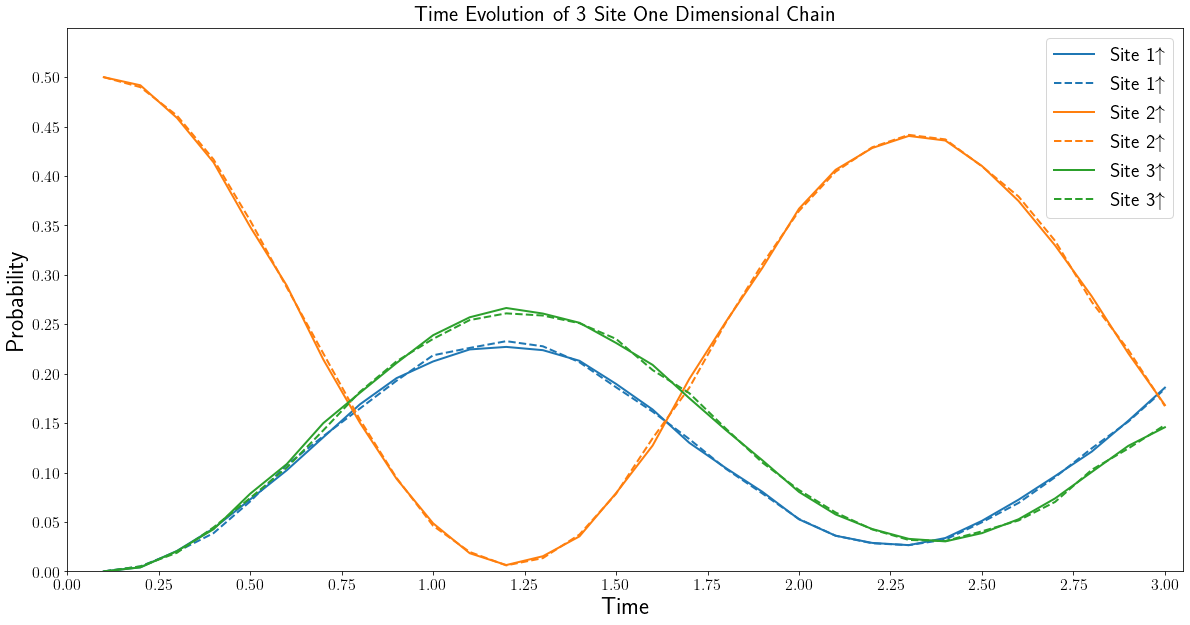

In [24]:
#Process and plot data
proc_data = np.zeros((2*nsite, time_steps))
times = np.arange(dt,time_steps*dt+dt, dt)
for t in range(time_steps):
    for i in range(2**(2*nsite)):
        num = get_bin(i, 2*nsite)
        for mode in range(len(num)):
            if num[mode]=='1':
                proc_data[mode,t] += run_results[i,t]
    norm = 0.0
    for mode in range(len(num)):
        norm += proc_data[mode,t]
    proc_data[:,t] = proc_data[:,t] / norm
    

fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())

for i in range(nsite):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(times, proc_data[i,:], linestyle='-', color=str(colors[i]), linewidth=2, label=strup)
    ax2.plot(times, proc_data[i+nsite,:], linestyle='--', color=str(colors[i]), linewidth=2, label=strup)


ax2.set_ylim(0, 0.55)
ax2.set_xlim(0, time_steps*dt+dt/2.)
ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.25))
ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)


In [ ]:
#Plot the raw data as a colormap
xticks = np.arange(2**(nsite*2))
xlabels=[]
print("Time Steps: ",time_steps, " Step Size: ",dt)
for i in range(2**(nsite*2)):
    xlabels.append(get_bin(i,6))
    
fig, ax = plt.subplots(figsize=(10,20))
c = ax.pcolor(run_results, cmap='binary')
ax.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
plt.yticks(xticks, xlabels, size=18)
ax.set_xlabel('Time Step', fontsize=22)
ax.set_ylabel('State', fontsize=26)
plt.show()

Below is the circuit diagram of the initalization to the state $\ket{\psi_0}=\ket{010}_\uparrow\ket{010}_\downarrow$ an a single time step.  As the system is evolved, all gates past the first barrier are repeated.
![title](circuit-diagram.png)

## Results

Placing two electrons of opposite spin into the middle site as the input state ($\ket{\psi_0}=\ket{010}_\uparrow\ket{010}_\downarrow$), we evolve the system in time.  For a hopping term of $t=1$ and on-site energy of $U=2$ and a time step of $\delta t=0.1$ (with units of inverse energy and $\hbar=1$) the following plot demonstrates the occupation oscillating between the middle and outer sites in the chain.  As the system evolves, this oscillation decays and begins to settle into an equilibrium occupation.
~![title](./t-1-U-2-dt-0.1-tsteps-30.png)

This decays can be seen better if we double the time the system is evolved further
![title](3-site-evolution-dt-0.1-tsteps-60.png)

Interesting evolutions can be seen for the 4 and 5 site chains
![title](4site_t-1-U-2-dt-0.1.png)
![title](5site_t-1-U-2-dt-0.1.png)

## Changing U

All plots below have paramaters of $\Delta t = 0.1$, $t = 1.0$, and a run for $30$ time steps.

### U=0.5
![title](t-1-U-0.5-dt-0.1-tsteps-30.png)

### U=1.0
![title](t-1-U-1.0-dt-0.1-tsteps-30.png)

### U=1.5
![title](t-1-U-1.5-dt-0.1-tsteps-30.png)

### U=2.0
![title](t-1-U-2.0-dt-0.1-tsteps-30.png)

### U=2.5
![title](t-1-U-2.5-dt-0.1-tsteps-30.png)